In [38]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
poverty = pd.read_csv('poverty.txt', sep='\t') 
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [104]:
brth15to17 = poverty['Brth15to17']
povpct = poverty['PovPct']
viocrime = poverty['ViolCrime']

In [106]:
brth15to17.shape,povpct.shape,viocrime.shape

((51,), (51,), (51,))

In [103]:
type(brth15to17)

pandas.core.series.Series

In [116]:
y = brth15to17.values
X = np.vstack((povpct.values,viocrime.values)).T

In [117]:
y.shape,X.shape

((51,), (51, 2))

Text(0, 0.5, 'Brth15to17')

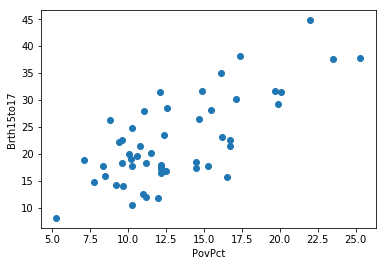

In [118]:
# plot these
plt.scatter(povpct,brth15to17)
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')

In [126]:
A = np.vstack((povpct.values,viocrime.values,np.ones(51))).T

In [127]:
A.shape,y.shape

((51, 3), (51,))

Placeholders

In [128]:
x_tf = tf.placeholder(tf.float32, shape=(None,None), name='input')
y_tf = tf.placeholder(tf.float32, shape=(None,), name='output')



In [129]:
x_trans = tf.transpose(x_tf)
x_trans_y = tf.matmul(x_trans,tf.expand_dims(y_tf,axis=1))
x_trans_x_inv = tf.matrix_inverse(tf.matmul(x_trans,x_tf))

weights = tf.matmul(x_trans_x_inv,x_trans_y)

In [130]:
weights

<tf.Tensor 'MatMul_8:0' shape=(?, 1) dtype=float32>

In [131]:
feed_dict = {x_tf: A,
             y_tf: y}

In [132]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    output = sess.run(weights, feed_dict=feed_dict)
    print(output)

[[1.0364971 ]
 [0.34420753]
 [5.9822235 ]]


In [136]:
w1 = output[0]
w2 = output[1]
w3 = output[2]

In [158]:
x1line = np.linspace(0.,30.,1000)
x2line = np.linspace(0.,40.,1000)
biasline = np.ones(1000)
yline = w1*x1line + w2*x2line+ w3*biasline

Text(0, 0.5, 'Brth15to17')

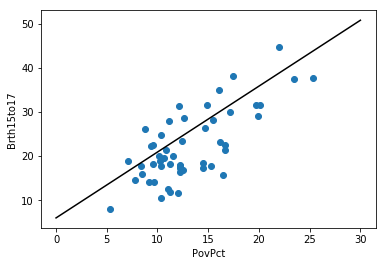

In [159]:
plt.plot(x1line,yline,'k-')
# plot these
plt.scatter(povpct,brth15to17)
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')

Text(0, 0.5, 'Brth15to17')

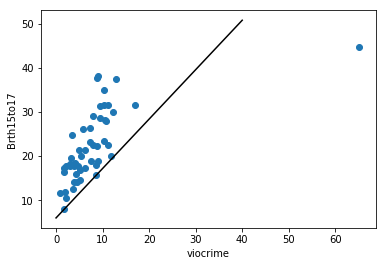

In [160]:
plt.plot(x2line,yline,'k-')
# plot these
plt.scatter(viocrime,brth15to17)
plt.xlabel('viocrime')
plt.ylabel('Brth15to17')